# Capitulo 7: Optimizacion Continua

En este notebook, exploraremos algoritmos de optimizacion de primer orden implementados en C++ y expuestos a Python.
Visualizaremos el comportamiento de Gradient Descent y Momentum sobre la funcion de Rosenbrock.

In [13]:
import sys
import os

# Añadir ruta de build
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build/Release')))

import numpy as np
import matplotlib.pyplot as plt
import mathml_cpp

## 1. Funcion de Rosenbrock

La funcion de Rosenbrock es un problema de prueba no convexo para algoritmos de optimizacion. Se define como:
$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$

Tiene un minimo global en $(1, 1)$, que se encuentra dentro de un valle parabolico largo y estrecho.

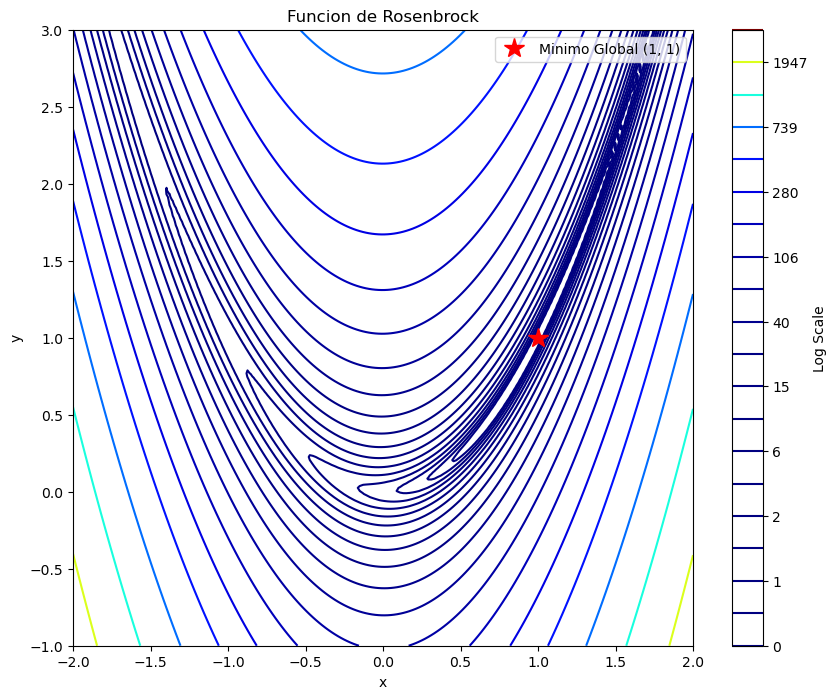

In [14]:
def rosenbrock_python(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_python(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap='jet')
plt.plot(1, 1, 'r*', markersize=15, label='Minimo Global (1, 1)')
plt.title('Funcion de Rosenbrock')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Log Scale')
plt.legend()
plt.show()

## 2. La Carrera: GD vs Momentum

Ejecutaremos ambos optimizadores desde el mismo punto de inicio dificil $(-1.5, 2.0)$ y observaremos sus trayectorias.

In [15]:
# Parametros
start_point = np.array([-1.5, 2.0])
learning_rate = 0.001
iterations = 500
momentum = 0.9

# Ejecutar optimizadores
# Usamos los wrappers especificos para maxima velocidad
path_gd = mathml_cpp.optimization.run_gd_on_rosenbrock(start_point, learning_rate, iterations)
path_momentum = mathml_cpp.optimization.run_momentum_on_rosenbrock(start_point, learning_rate, momentum, iterations)

# Convertir a numpy arrays para graficar
path_gd = np.array(path_gd)
path_momentum = np.array(path_momentum)

print(f"Pasos GD: {len(path_gd)}")
print(f"Final GD: {path_gd[-1]}")
print(f"Pasos Momentum: {len(path_momentum)}")
print(f"Final Momentum: {path_momentum[-1]}")

Pasos GD: 501
Final GD: [-1.11286844  1.24637366]
Pasos Momentum: 501
Final Momentum: [0.93347568 0.87109962]


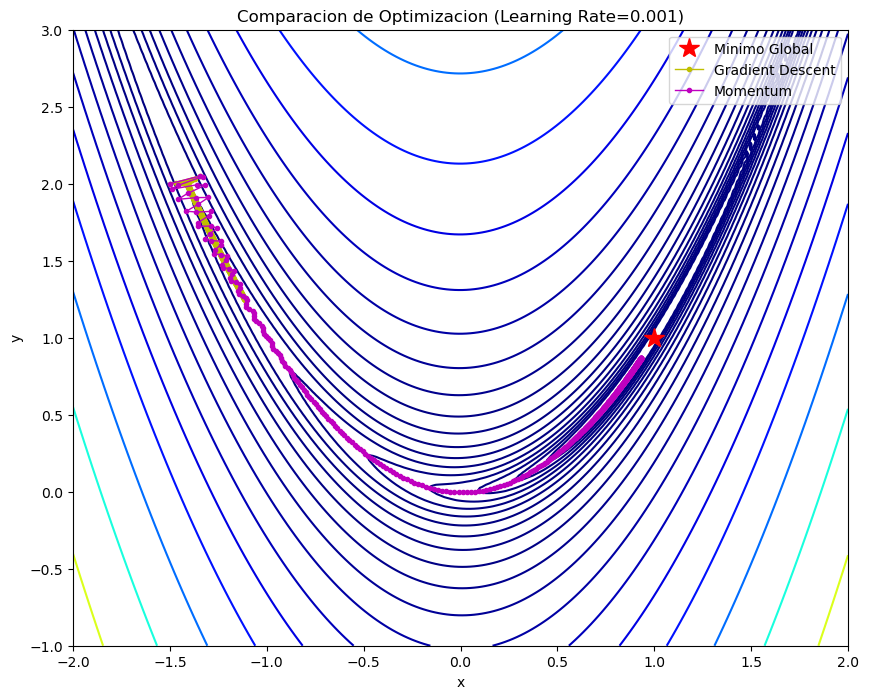

In [16]:
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap='jet')
plt.plot(1, 1, 'r*', markersize=15, label='Minimo Global')

# Graficar trayectorias
plt.plot(path_gd[:, 0], path_gd[:, 1], 'y.-', label='Gradient Descent', linewidth=1)
plt.plot(path_momentum[:, 0], path_momentum[:, 1], 'm.-', label='Momentum', linewidth=1)

plt.title(f'Comparacion de Optimizacion (Learning Rate={learning_rate})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Conclusion

Como podemos ver, **Momentum** ayuda al optimizador a ganar velocidad en direcciones con gradientes consistentes y amortigua las oscilaciones, permitiendole navegar el valle curvo de Rosenbrock mucho mas rapido que el Descenso de Gradiente estandar.